# Chaos Game and Attractors

The ideia of this notebook is to define a set of rules that guide the choice os points in order to form interesting patterns.

These points are then plotted to reveal a surprising image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange as rrange, random

# Sierpinski Triangle

In order to draw the Sierpinski triangle, the set of rules to follow is quite simple. 

Start by defining the three vertices of the triangle.
Once that's done, simply choose a starting point randomly on the 2D plane (regardless of whether it's inside or outside of the triangle).

Now, randomly choose a vertex from the triangle (each vertex has the same probability of being chosen) and move to the midpoint between your current position and the newly chosen vertex. This is your new position, save it and repeat the process.

In the end you should get a Sierpisnki triangle.

In [2]:
def randP(poly):
    return poly[rrange(0,len(poly))]

def halfstep(p1, p2):
    return (p1 + p2) / 2.0

def nthstep(p1, p2, n):
    return (p1 + p2) / float(n)

def genPoints(poly, iterations, nth_part=2.0):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = nthstep(p, randP(poly), nth_part)
        steps.append(p)
    return np.array(steps)

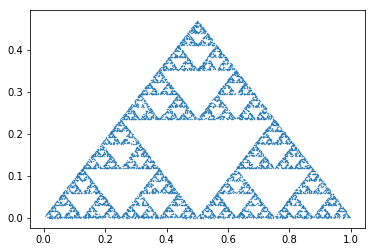

In [3]:
triangle = np.array([[0.0, 0.0], [0.5, 0.47], [1.0, 0.0]])
sierpinski = genPoints(triangle, 10000)

X = sierpinski[:,0]
Y = sierpinski[:,1]

plt.scatter(X, Y, s=0.1)
plt.show()

# Barnsley Fern

The set of rules that govern the Barnsley Fern is slightly more complicated. They rely on linear transformations with different probabilities distributed among them.

The set of rules can be summarized by the following functions:

\begin{equation}
    f_1(x,y) = 
        \begin{bmatrix}
            0 & 0 \\
            0 & 0.16
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
\end{equation}

\begin{equation}
    f_2(x,y) = 
        \begin{bmatrix}
            0.85 & 0.4 \\
            -0.04 & 0.85
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            1.6
        \end{bmatrix}      
\end{equation}

\begin{equation}
    f_3(x,y) = 
        \begin{bmatrix}
            0.2 & -0.26 \\
            0.23 & 0.22
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            1.6
        \end{bmatrix}      
\end{equation}

\begin{equation}
    f_4(x,y) = 
        \begin{bmatrix}
            -0.15 & -0.28 \\
            0.26 & 0.24
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            0.44
        \end{bmatrix}      
\end{equation}


Once again, start with a random point. Then apply one of the above transformations according to the following probabilities:

\begin{equation}
    P[f_1] = 1\%,\\P[f_2] = 85\%,\\P[f_3] = 7\%,\\P[f_4] = 7\%
\end{equation}

Add this new point to the scatter plot and repeat the process. After lots of iterations you should end up with an image that resembles a fern - the Barnsley Fern.

In [4]:
def barnsley_transformations(point, case):
    if case == 0:
        return np.array([[0.0, 0.0], [0.0, 0.16]]).dot(point)
    if case == 1:
        return np.array([[0.85, 0.04], [-0.04, 0.85]]).dot(point) + np.array([0.0, 1.6])
    if case == 2:
        return np.array([[0.2, -0.26], [0.23, 0.22]]).dot(point) + np.array([0.0, 1.6])
    if case == 3:
        return np.array([[-0.15, 0.28], [0.26, 0.24]]).dot(point) + np.array([0.0, 0.44])
    
def rand_transformation(p):
    r = random()
    if r < 0.01:
        return barnsley_transformations(p, 0)
    if r < 0.86:
        return barnsley_transformations(p, 1)
    if r < 0.93:
        return barnsley_transformations(p, 2)
    
    return barnsley_transformations(p, 3)


def gen_fern(iterations):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = rand_transformation(p)
        steps.append(p)
    return np.array(steps)

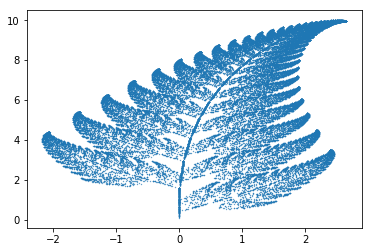

In [5]:
barnsley_fern = gen_fern(50000)

X = barnsley_fern[:, 0]
Y = barnsley_fern[:, 1]

plt.scatter(X, Y, s=0.1)
plt.show()